In [1]:
from openai import OpenAI
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()
client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY")
)

In [3]:
def get_response(messages, model="gpt-3.5-turbo", temperature=0.7):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )
    return response.choices[0].message.content

In [4]:
# Check if the question is ambiguous or not with few-shot prompt.

def check_ambiguous(query):
    content = f"Q: Who was the first woman to make a solo flight across this ocean? // This question is ambiguous: True \
        Q: Who was the first woman to make a solo flight across the Atlantic? // This question is ambiguous: False \
        Q: In which city were Rotary Clubs set up in 1905? // This question is ambiguous: False \
        Q: Who along with Philips developed the CD in the late 70s? // This question is ambiguous:  False \
        Q: Where is the multinational corporation based? // This question is ambiguous: True \
        Q: {query} // This question is ambiguous:"
    
    messages = [
        {"role": "user", "content": content},
    ]

    return get_response(messages)

In [5]:
# Ask the question to clarify the query with few-shot prompt.

def question_to_clarify(query):
    content = f"""
        This is a conversation between a user and a question-answering bot.
        User: On what date did he land on the moon?
        Bot: To answer this question, I need to ask the following clarifying question:
        Who is he?

        ###

        User: Which country on this continent has the largest population?
        Bot: To answer this question, I need to ask the following clarifying question:
        Which continent?

        ###
        
        User: {query}
        Bot: To answer this question, I need to ask the following clarifying question:
    """

    messages = [
        {"role": "user", "content": content},
    ]
    
    return get_response(messages)

In [6]:
# If the query was ambiguous, make final answer with clarifying information.
# Else, just give an answer of the query.

def get_final_answer(query, clarify_q=None, clarify_a=None):
    if clarify_q is not None:
        content = f"User: {query} \n Bot: {clarify_q} \n User: {clarify_a} \n Bot:"
    else:
        content = f"User: {query} \n Bot:"

    messages = [
        {"role": "user", "content": content},
    ]
    
    return get_response(messages)

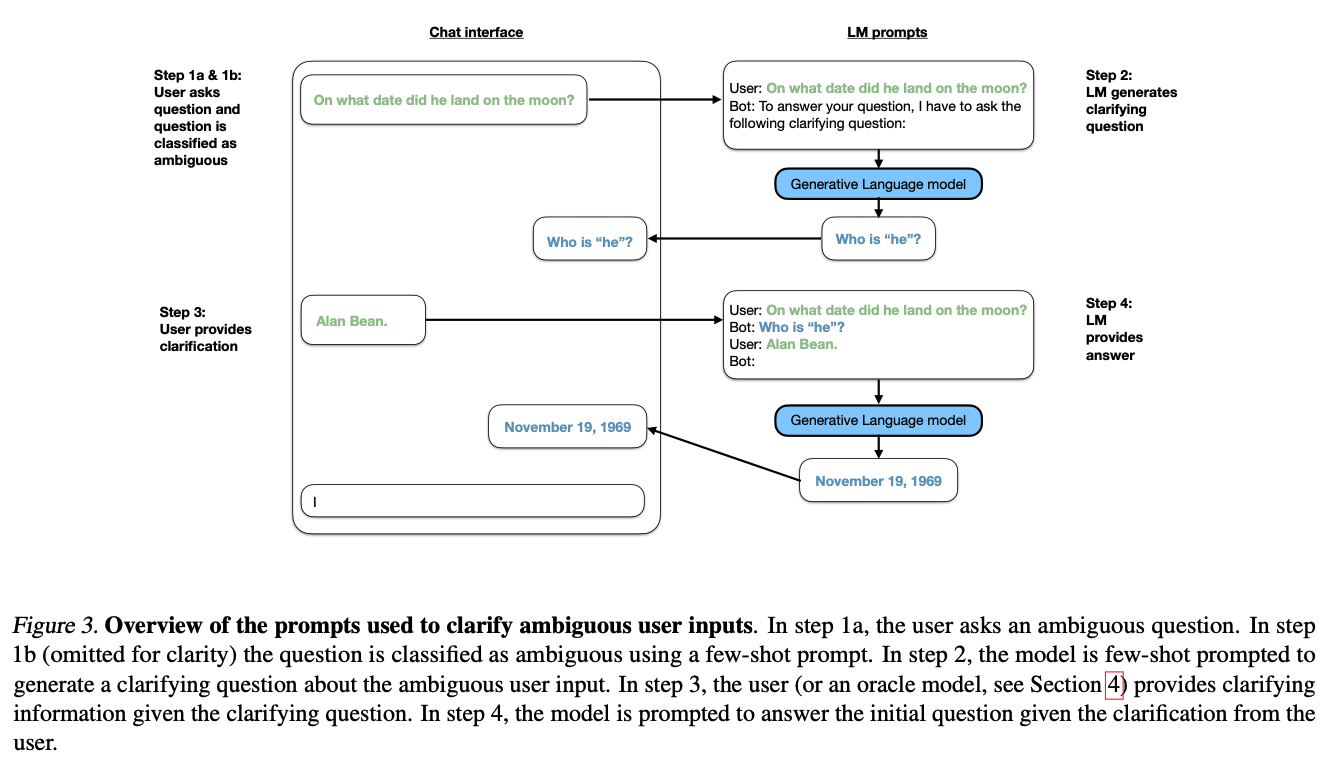

In [8]:
query = "When did he become president?"
print(f"User: {query}")

clarify_q = None
clarify_a = None
# Step 1a & 1b: User asks question and question is classified as ambiguous
if check_ambiguous(query) == "True":

    # Step 2: LM generates clarifying question
    clarify_q = question_to_clarify(query)
    print(f'Bot: {clarify_q}')

    # Step 3: User provides clarification
    clarify_a = input()
    print(f'User: {clarify_a}')

# Step 4: LM provides answer
final_answer = get_final_answer(query, clarify_q, clarify_a)
print(f'Bot: {final_answer}')

User: When did he become president?
Bot: Who is he?
User: Donald Trump.
Bot: Donald Trump became president on January 20, 2017.


In [63]:
query = "When did obama become president?"
print(f"User: {query}")

clarify_q = None
clarify_a = None
if check_ambiguous(query) == "True":
    clarify_q = question_to_clarify(query)
    print(f'Bot: {clarify_q}')
    clarify_a = input()
    print(f'User: {clarify_a}')

final_answer = get_final_answer(query, clarify_q, clarify_a)

print(f'Bot: {final_answer}')

User: When did obama become president?
Bot: Barack Obama became the 44th President of the United States on January 20, 2009.


In [12]:
query = "On what date did he land on the moon?"
print(f"User: {query}")

clarify_q = None
clarify_a = None
if check_ambiguous(query) == "True":
    clarify_q = question_to_clarify(query)
    print(f'Bot: {clarify_q}')
    clarify_a = input()
    print(f'User: {clarify_a}')

final_answer = get_final_answer(query, clarify_q, clarify_a)

print(f'Bot: {final_answer}')

User: On what date did he land on the moon?
Bot: Who is he?
User: Alan Bean.
Bot: Alan Bean landed on the moon on November 14, 1969.
